# Exploring Data - the fun stuff!

## Reading in data

Today, I'm going to show you how to read in tabular data. Next week, you'll discuss a common data format called netCDF that contains multidimensional data.

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

* [NumPy](https://numpy.org/) - Numerical Python package for array/matrix data manipulation
* [Pandas](https://pandas.pydata.org/) - Panal data or tabular data reading and manipulation
* [matplotlib](https://matplotlib.org/) - plotting library
* [datetime](https://docs.python.org/3/library/datetime.html) - standard library time package
* [scipy](https://www.scipy.org/) - scientific Python (we'll import later)

## Christman Field Weather Station

To read the data, we use Pandas. Specifically, the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [43]:
christman_field = pd.read_csv('./christman_field_20201010-20201014.csv', header=0)

In [44]:
print(christman_field)

             DateTime    Temp     RH     DewPt   Wind  Dir   Gust  GustDir  \
0    2020-10-14 23:00   6.333  69.20  1.103920  1.954  189  4.116      126   
1    2020-10-14 22:00   6.468  70.73  1.538129  2.641  131  4.763      131   
2    2020-10-14 21:00   6.880  67.91  1.365726  2.670  120  4.920      144   
3    2020-10-14 20:00   7.300  66.25  1.421898  3.145  179  5.743      136   
4    2020-10-14 19:00   7.715  64.69  1.484818  3.263  135  5.547      138   
..                ...     ...    ...       ...    ...  ...    ...      ...   
115  2020-10-10 04:00  10.080  43.87 -1.663476  0.870   16  2.548      262   
116  2020-10-10 03:00  10.530  41.37 -2.051844  0.746  264  1.980      264   
117  2020-10-10 02:00  11.060  31.72 -5.132987  0.861  307  2.548      314   
118  2020-10-10 01:00   9.830  41.60 -2.609558  1.408  359  2.411      338   
119  2020-10-10 00:00  11.180  37.81 -2.683663  0.825  359  2.372      357   

       Press  Solar  Prec  
0    841.630  0.005     0  
1    83

### To extact pieces of data from Pandas

For column data, the interface is similar to the Python dictionary key-value pair. Printing returns a Pandas DataSeries, which is essentially a NumPy array with metadata.

We also use the `to_datetime` function in Pandas to convert the date time strings into data information we can use.

In [56]:
time = pd.to_datetime(christman_field["DateTime"])
temperature = christman_field["Temp"]
solar = christman_field["Solar"]
wind = christman_field["Wind"]
print(time)
print(temperature)
print(solar)
print(wind)

0     2020-10-14 23:00:00
1     2020-10-14 22:00:00
2     2020-10-14 21:00:00
3     2020-10-14 20:00:00
4     2020-10-14 19:00:00
              ...        
115   2020-10-10 04:00:00
116   2020-10-10 03:00:00
117   2020-10-10 02:00:00
118   2020-10-10 01:00:00
119   2020-10-10 00:00:00
Name: DateTime, Length: 120, dtype: datetime64[ns]
0       6.333
1       6.468
2       6.880
3       7.300
4       7.715
        ...  
115    10.080
116    10.530
117    11.060
118     9.830
119    11.180
Name: Temp, Length: 120, dtype: float64
0      0.005
1      0.056
2      0.018
3      0.022
4      0.163
       ...  
115    0.000
116    0.000
117    0.000
118    0.001
119    0.001
Name: Solar, Length: 120, dtype: float64
0      1.954
1      2.641
2      2.670
3      3.145
4      3.263
       ...  
115    0.870
116    0.746
117    0.861
118    1.408
119    0.825
Name: Wind, Length: 120, dtype: float64


With the arrays, we can calculate some basic statistics on the temperature and incoming solar radiation

In [60]:
print('Temperature (F)')
print('\tMax:', np.max(temperature))
print('\tMin:', np.min(temperature))
print('\tMean:', np.mean(temperature))
print('Wind (mph)')
print('\tMax:', np.max(wind))
print('\tMin:', np.min(wind))
print('\tMean:', np.mean(wind))
print('Incoming Solar Radiation (W/m2)')
print('\tMax:', np.max(solar))
print('\tMin:', np.min(solar))
print('\tMean:', np.mean(solar))

Temperature (F)
	Max: 25.19
	Min: 0.844
	Mean: 14.552225
Wind (mph)
	Max: 18.88
	Min: 0.067
	Mean: 3.6963999999999997
Incoming Solar Radiation (W/m2)
	Max: 648.8
	Min: 0.0
	Mean: 143.81460833333333


Let's visualize the data!

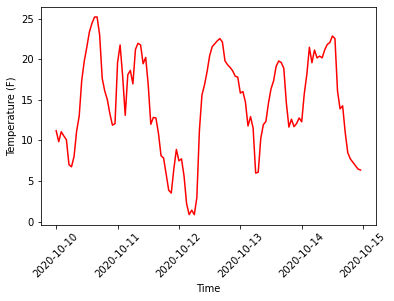

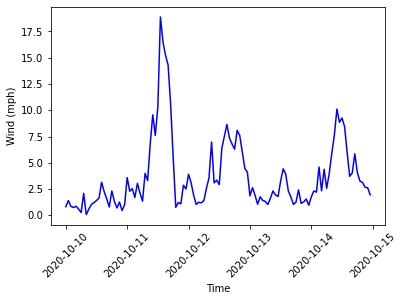

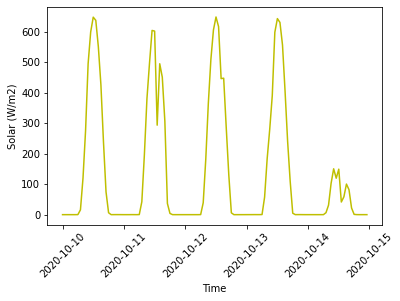

In [61]:
fig, ax = plt.subplots()
plt.plot(time, temperature, color='r')
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.xticks([datetime.date(2020, 10, 10), datetime.date(2020, 10, 11), datetime.date(2020, 10, 12), 
            datetime.date(2020, 10, 13), datetime.date(2020, 10, 14), datetime.date(2020, 10, 15)], rotation=45);
fig, ax = plt.subplots()
plt.plot(time, wind, color='b')
plt.xlabel('Time')
plt.ylabel('Wind (mph)')
plt.xticks([datetime.date(2020, 10, 10), datetime.date(2020, 10, 11), datetime.date(2020, 10, 12), 
            datetime.date(2020, 10, 13), datetime.date(2020, 10, 14), datetime.date(2020, 10, 15)], rotation=45);

fig, ax = plt.subplots()
plt.plot(time, solar, color='y')
plt.xlabel('Time')
plt.ylabel('Solar (W/m2)')
plt.xticks([datetime.date(2020, 10, 10), datetime.date(2020, 10, 11), datetime.date(2020, 10, 12), 
            datetime.date(2020, 10, 13), datetime.date(2020, 10, 14), datetime.date(2020, 10, 15)], rotation=45);

[Cheyenne radar loop](http://schubert.atmos.colostate.edu/~cslocum/nexrad/img/levelii/20201014_kcys.gif)

## Is solar radiation correlated to the temperature?

We need a statistics package! Fortunately, there is one - SciPy!

We can import the [Pearson correlation coefficient](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) function to calculate R and the accompanying p-value.

In [51]:
from scipy.stats import pearsonr

r, pvalue = pearsonr(temperature, solar)
print('R', r)
print('p-value', pvalue)

R 0.42677142542199525
p-value 1.1699317817627078e-06
